In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

In [4]:
df= pd.read_csv('customer_segmentation_data.csv')

In [5]:
df.head(5)

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


#### Checking Data Hygiene

In [6]:
df.shape

(53503, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

In [8]:
df.duplicated().sum().sum()

0

In [9]:
df.drop("Customer ID", axis=1, inplace= True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 53503 non-null  int64 
 1   Gender                              53503 non-null  object
 2   Marital Status                      53503 non-null  object
 3   Education Level                     53503 non-null  object
 4   Geographic Information              53503 non-null  object
 5   Occupation                          53503 non-null  object
 6   Income Level                        53503 non-null  int64 
 7   Behavioral Data                     53503 non-null  object
 8   Purchase History                    53503 non-null  object
 9   Interactions with Customer Service  53503 non-null  object
 10  Insurance Products Owned            53503 non-null  object
 11  Coverage Amount                     53503 non-null  in

In [11]:
df.isnull().sum().sum()

0

In [12]:
df['Purchase History'] = pd.to_datetime(df['Purchase History'],format='mixed')

#### Outliers in the data

In [13]:
df.describe(include ='all')

,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
count,53503.000000,53503,53503,53503,53503,53503,53503.000000,53503,53503,53503,53503,53503.000000,53503.000000,53503,53503,53503,53503,53503,53503
unique,NaN,2,5,5,35,9,NaN,5,NaN,5,5,NaN,NaN,4,5,5,5,5,5
top,NaN,Male,Married,Associate Degree,Lakshadweep,Salesperson,NaN,policy3,NaN,Chat,policy1,NaN,NaN,Group,Mail,In-Person Meeting,Weekends,German,Segment5
freq,NaN,27499,13219,12213,2140,7919,NaN,15761,NaN,14153,13365,NaN,NaN,18255,11887,14311,14092,14452,13976
mean,44.140945,NaN,NaN,NaN,NaN,NaN,82768.324318,NaN,2021-01-01 14:46:59.415733760,NaN,NaN,492580.789638,3023.702447,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,20001.000000,NaN,2018-01-01 00:00:00,NaN,NaN,50001.000000,500.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,51568.500000,NaN,2019-07-10 00:00:00,NaN,NaN,249613.500000,1817.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,43.000000,NaN,NaN,NaN,NaN,NaN,80719.000000,NaN,2021-01-01 00:00:00,NaN,NaN,477261.000000,3194.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,115973.500000,NaN,2022-06-28 00:00:00,NaN,NaN,739124.000000,4311.500000,NaN,NaN,NaN,NaN,NaN,NaN
max,70.000000,NaN,NaN,NaN,NaN,NaN,149999.000000,NaN,2023-12-28 00:00:00,NaN,NaN,1000000.000000,5000.000000,NaN,NaN,NaN,NaN,NaN,NaN


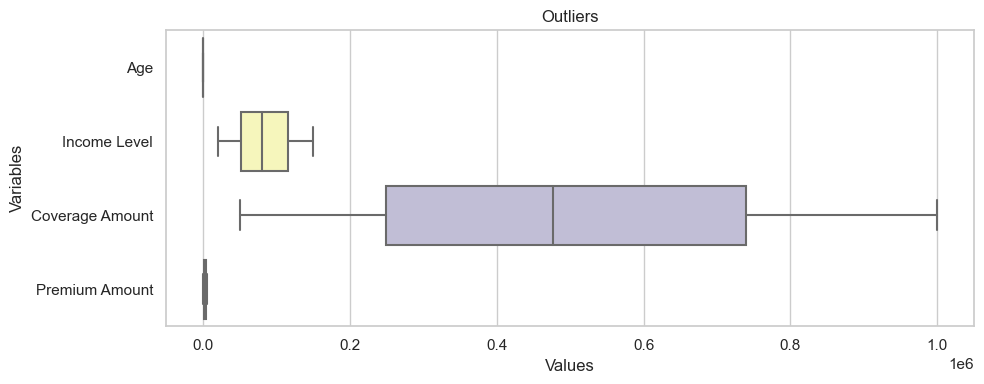

In [14]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, orient='h', palette='Set3')
plt.title('Outliers', fontsize=12)
plt.xlabel('Values')
plt.ylabel('Variables')
plt.tight_layout()
plt.show();

#### The dataset is about an Customers of an Insurance company and their history. The shape of the dataset is 53,503 values per 20 columns. There are 5 integers and 15 object data types in the dataset, and is using 8.2+ Data MB usage. 

#### The dataset does not contain null values, duplicate values or junk values. However, we have removed customer ID column from the data as it is not relvant to our analysis, and converted purchase history data type as it is was object data type vairable before and now converted to datetime format. 

#### The dataset apparently looks clean and fit for analysis and modelling and data cleansing is not required. 

### Univariate Analysis

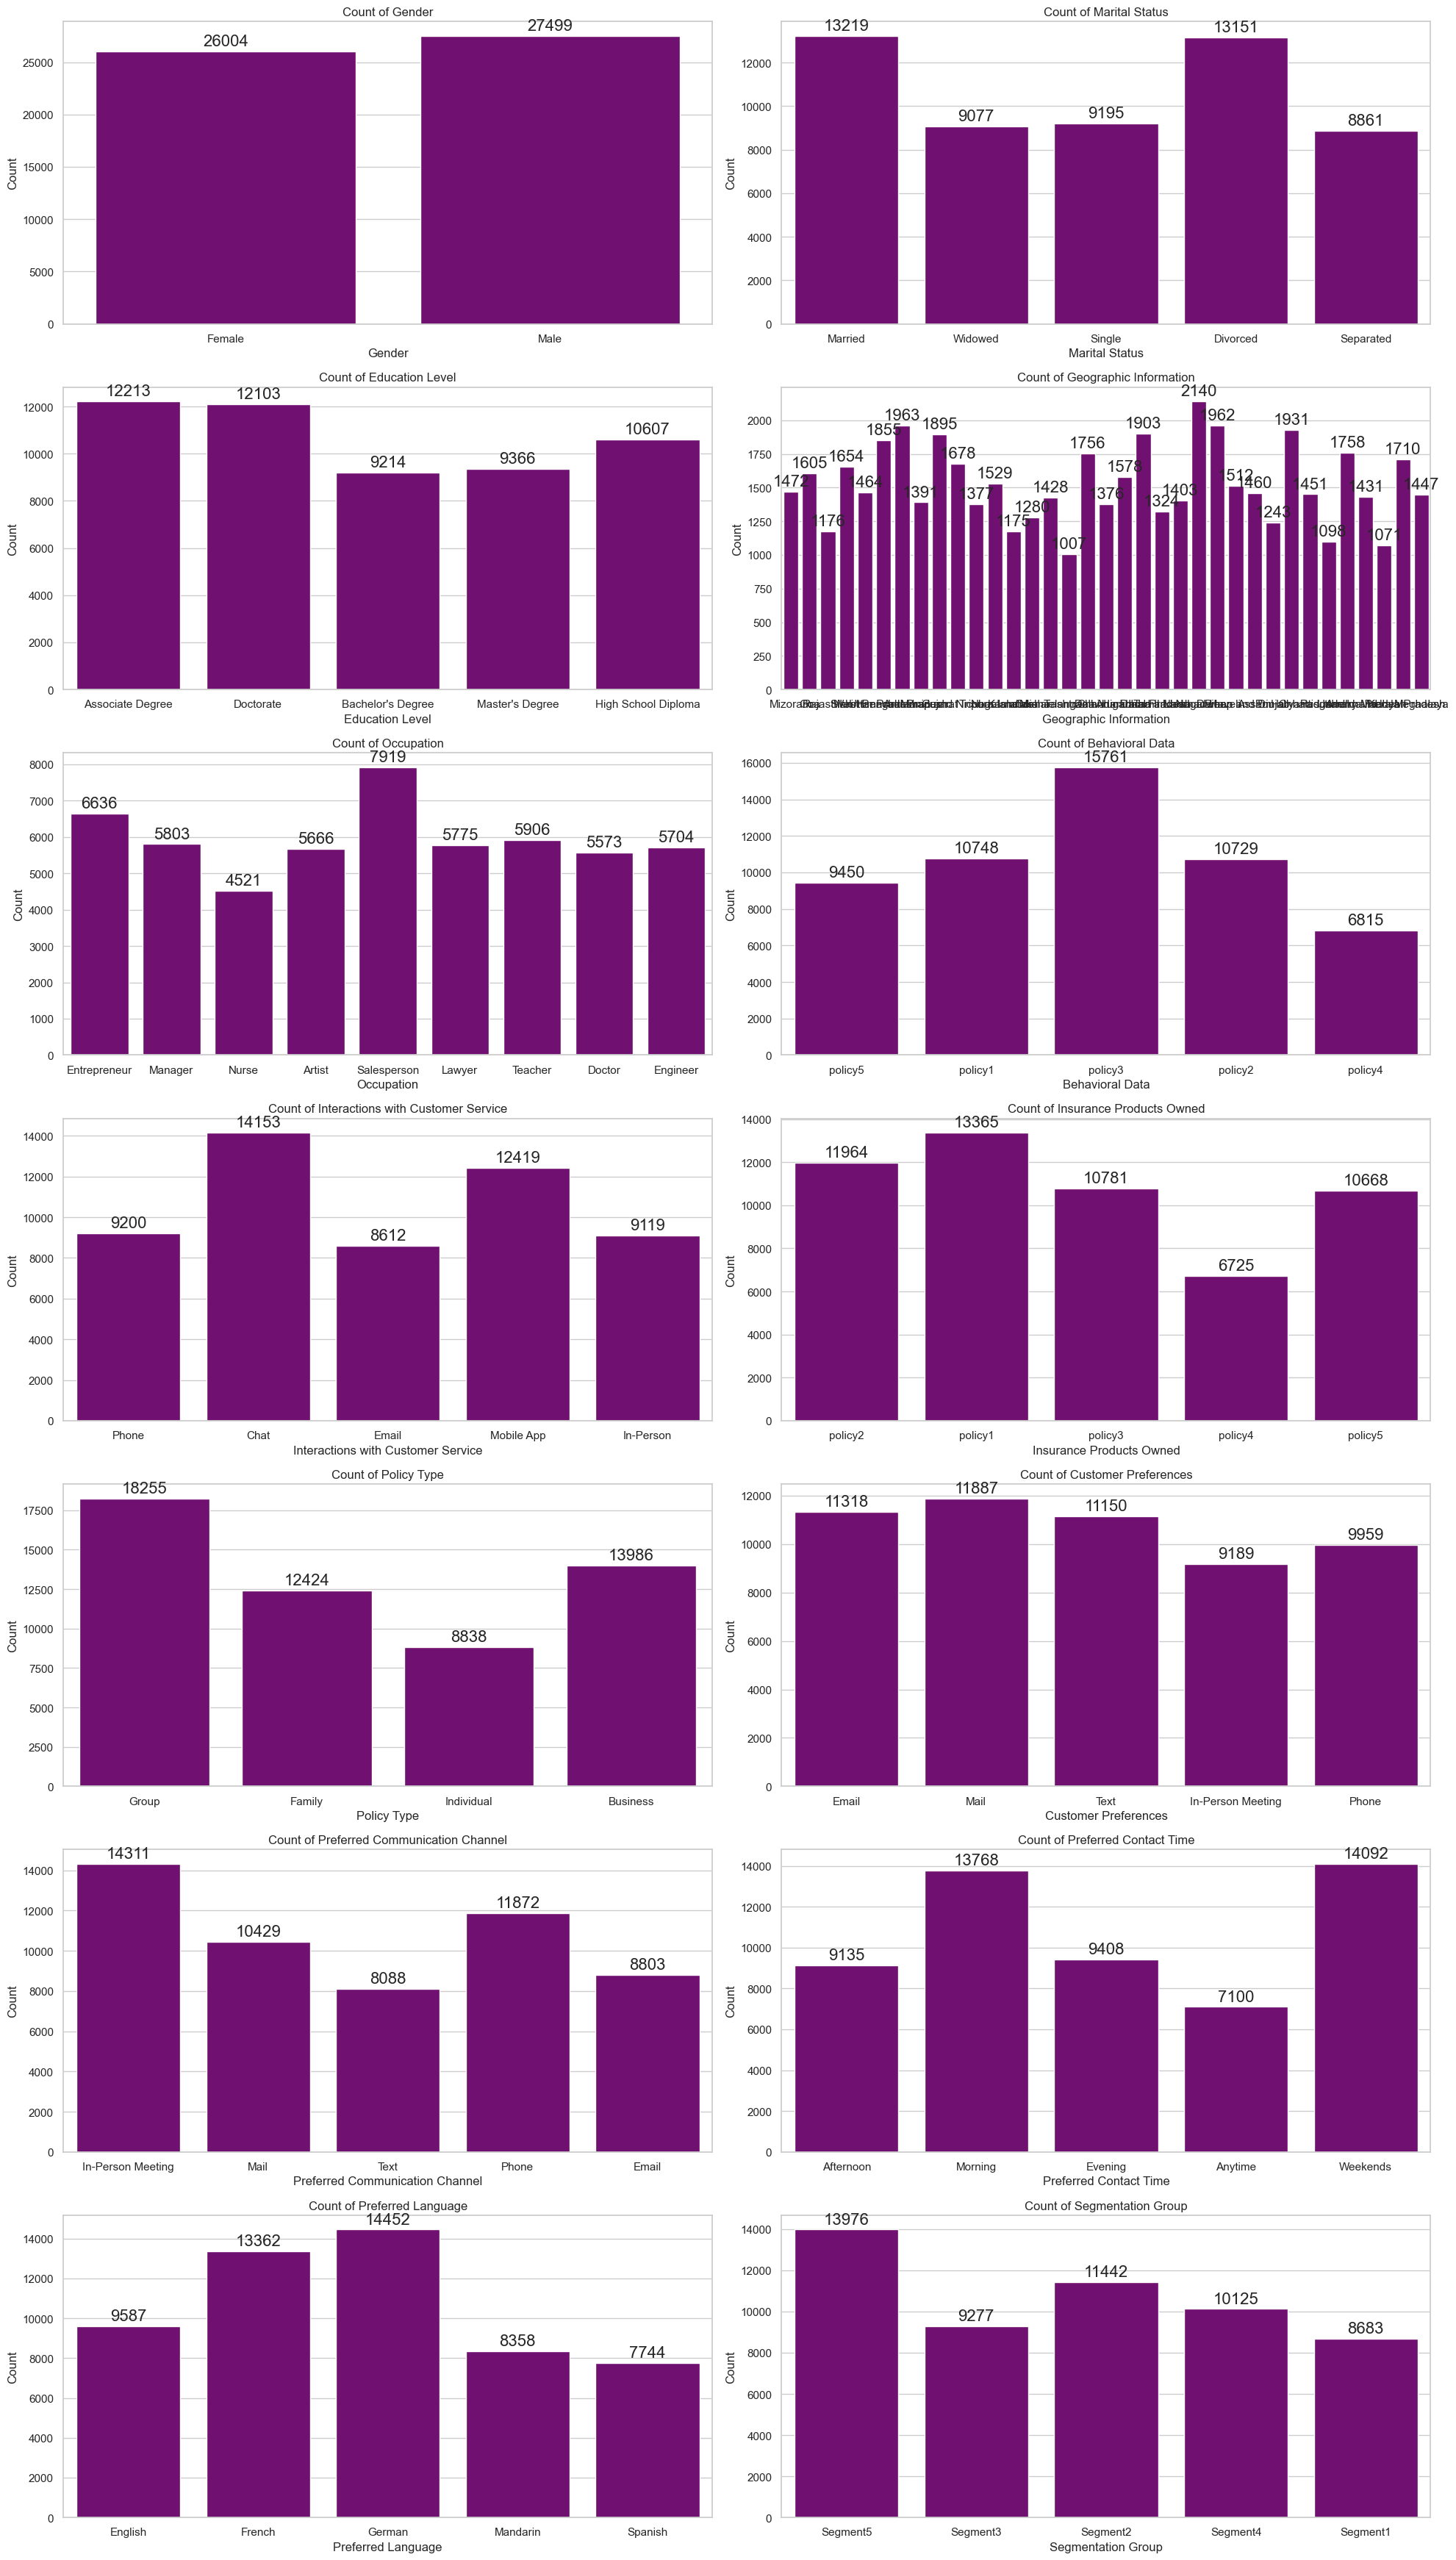

In [15]:
# Define the number of columns per row
num_cols_per_row = 2

# Calculate the number of rows needed based on the number of object type columns
num_rows = (len(df.select_dtypes(include=['object']).columns) + num_cols_per_row - 1) // num_cols_per_row

# Create a figure and a set of subplots
fig, axs = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 35))

# Flatten the axs array if it's a multi-dimensional array
axs = axs.flatten()

# Loop over each column and plot
for i, column in enumerate(df.select_dtypes(include=['object']).columns):
    ax = axs[i]  # Select the appropriate subplot
    sns.countplot(data=df, x=column, color='purple', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'Count of {column}')
    
    # Annotating bars with counts
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points',
                   fontsize= 16)

# Hide empty subplots
for i in range(len(df.select_dtypes(include=['object']).columns), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

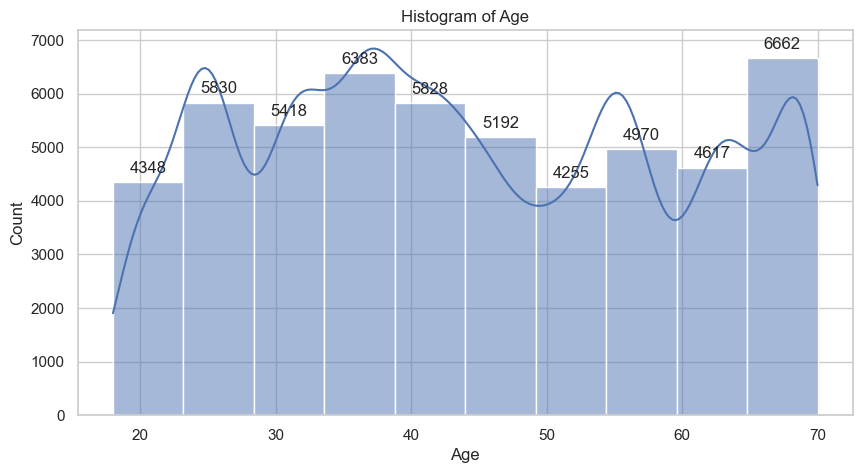

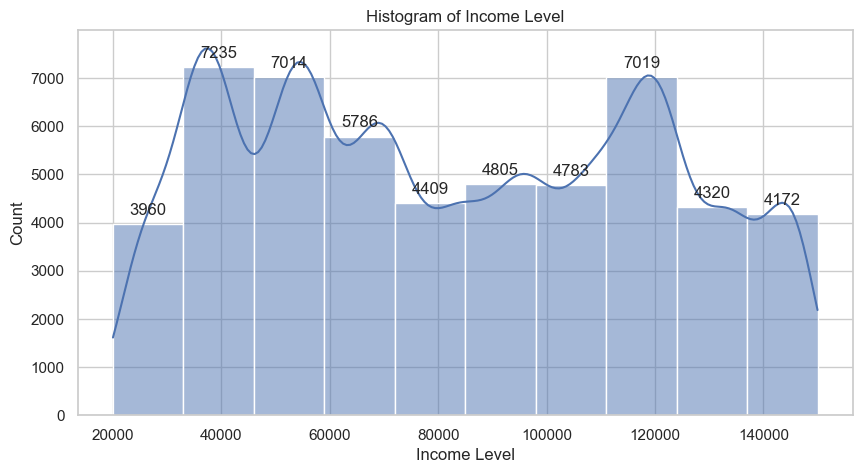

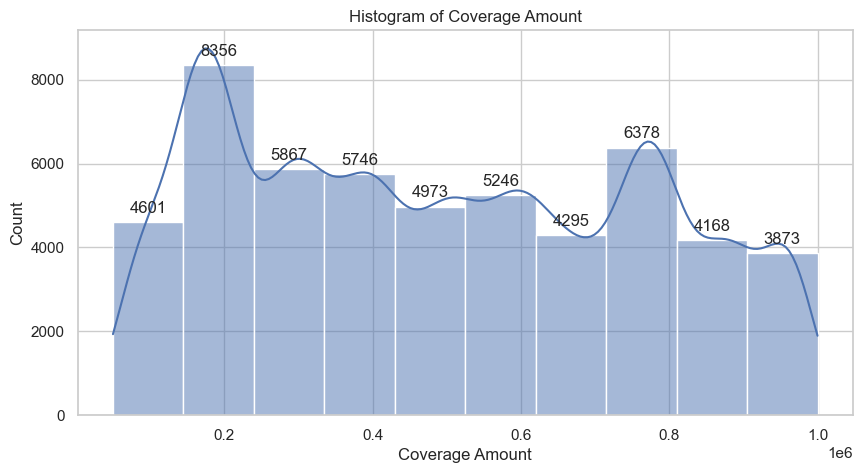

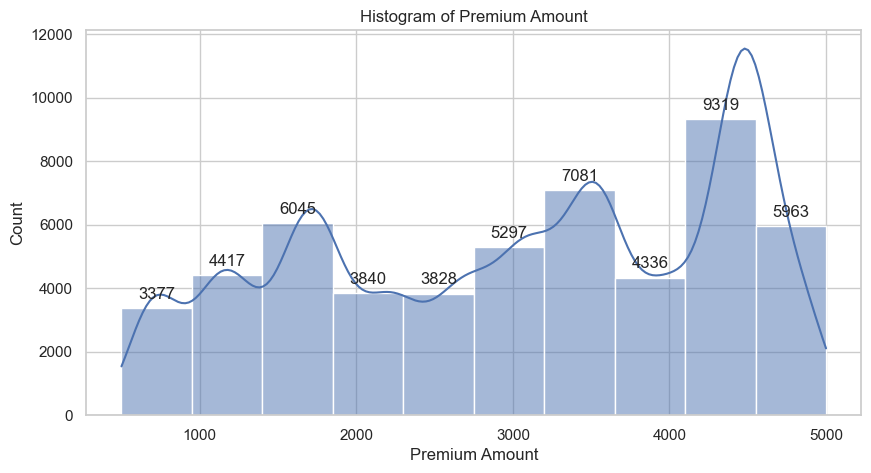

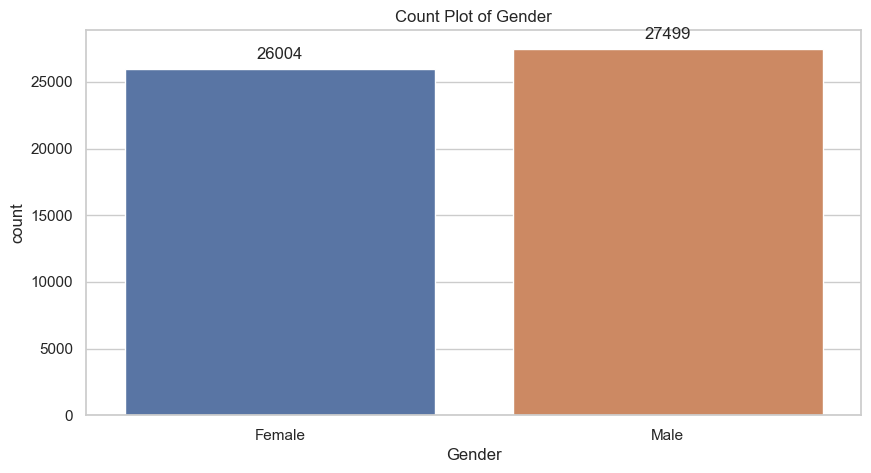

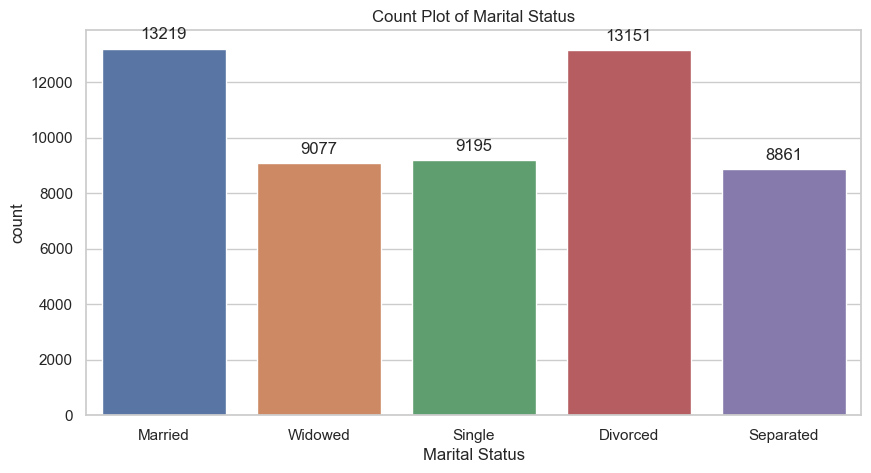

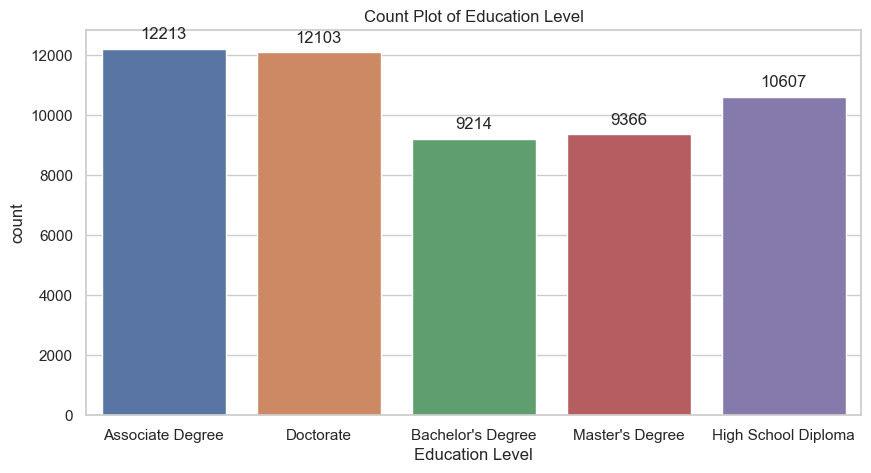

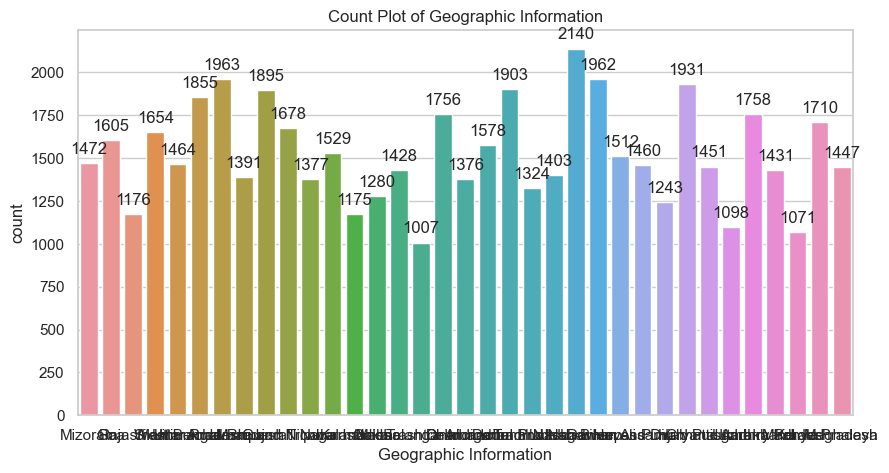

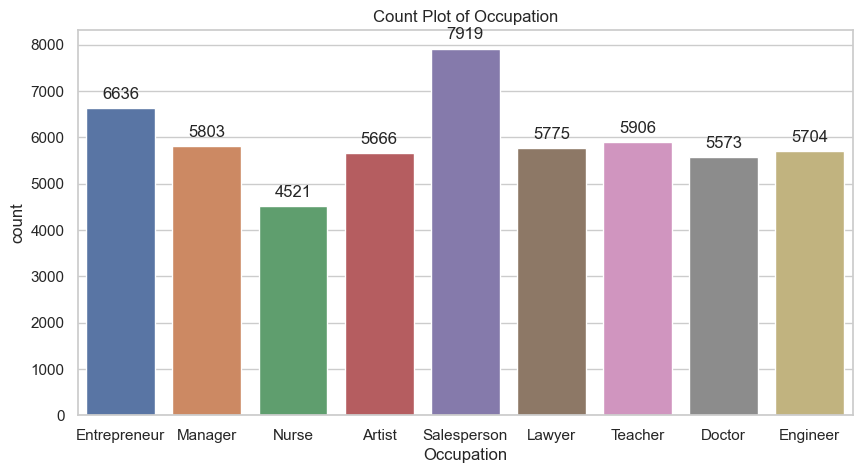

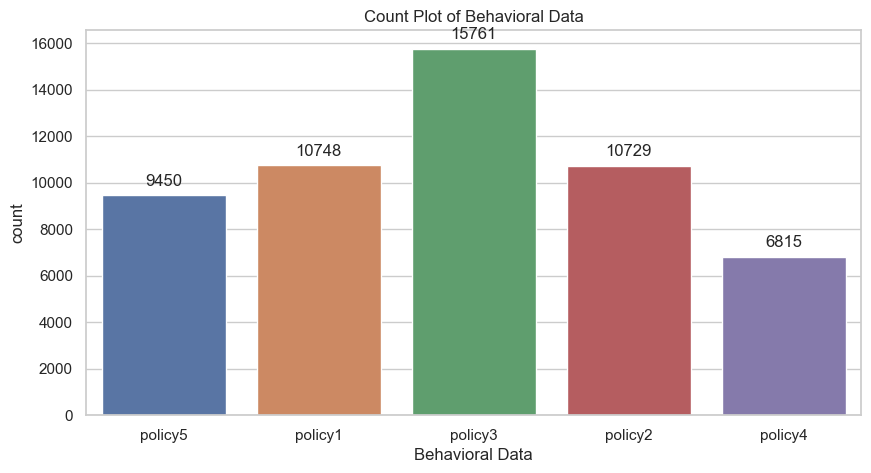

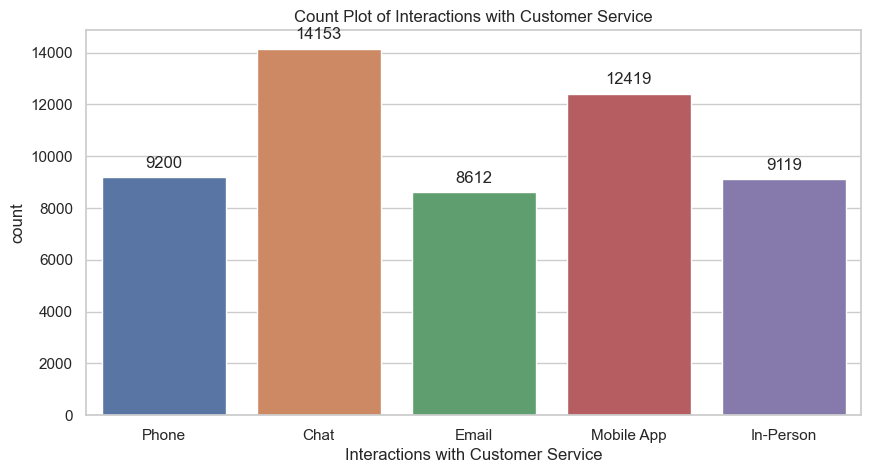

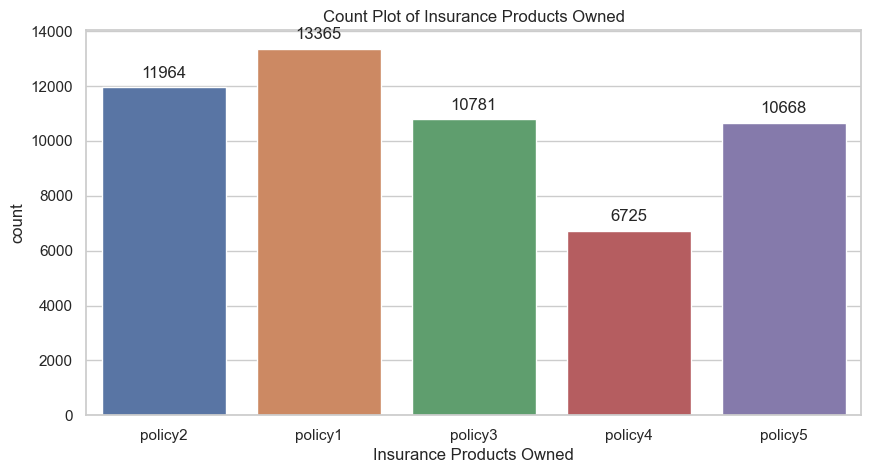

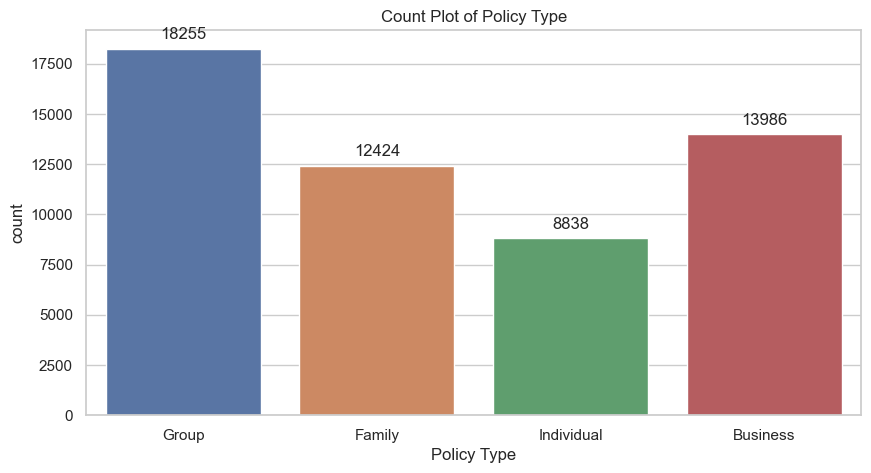

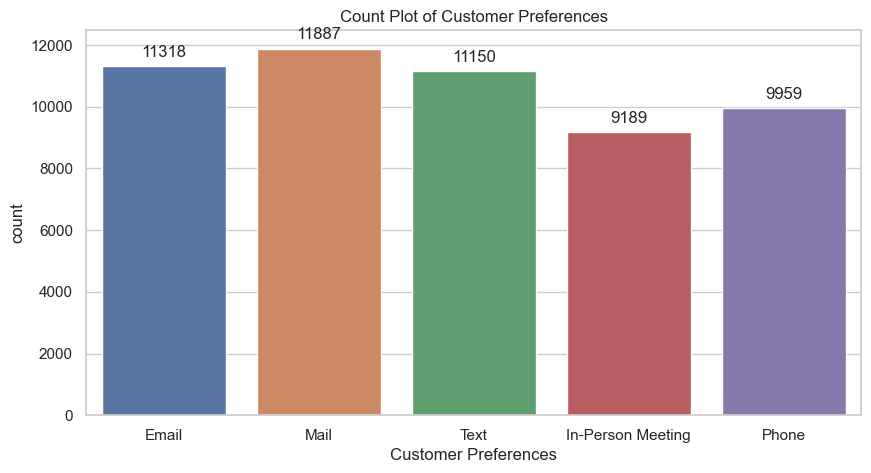

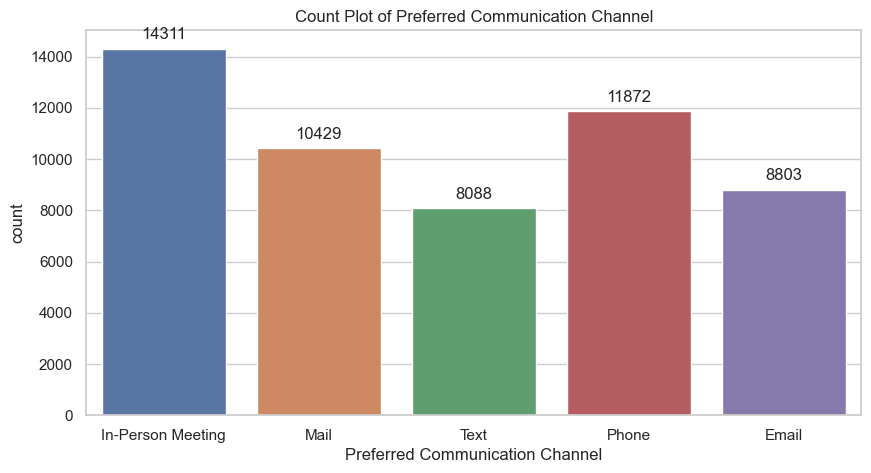

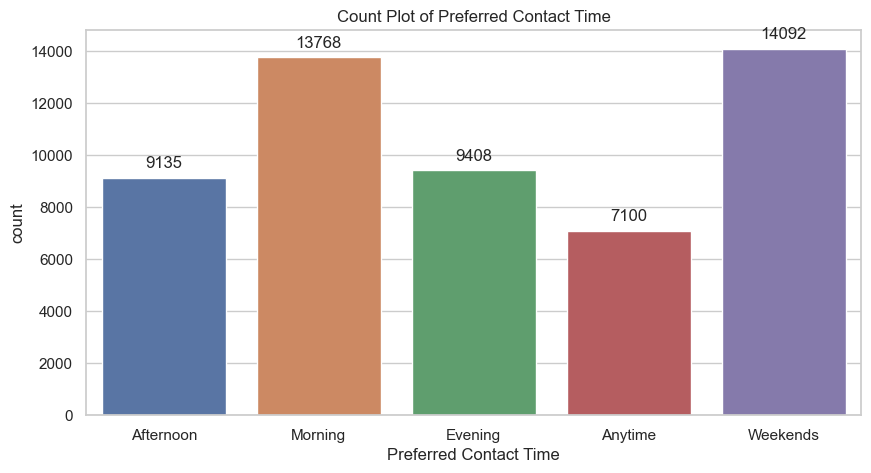

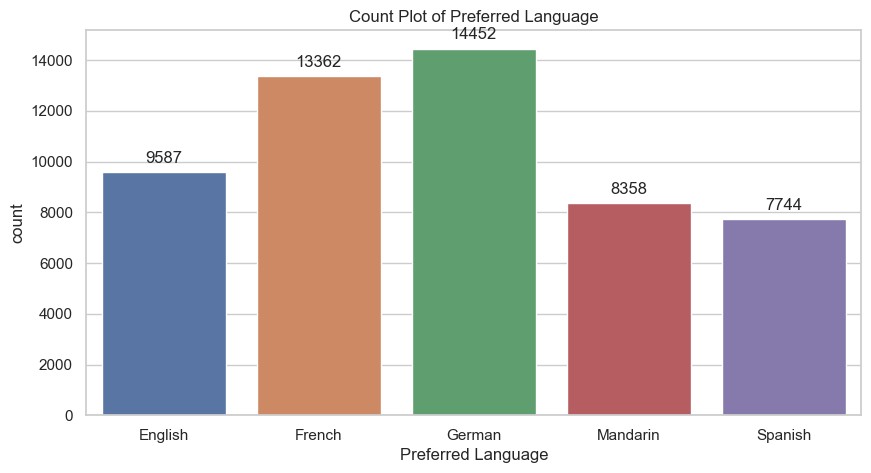

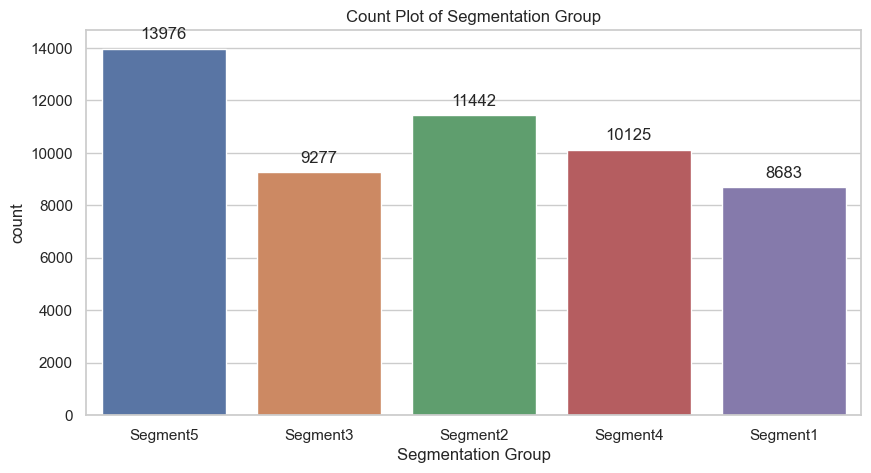

In [16]:
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, bins=10, kde=True)
    plt.title(f'Histogram of {col}')
    
    # Annotating histograms with counts
    for p in plt.gca().patches:
        plt.gca().annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

# Plot count plots for object columns
for col in df.select_dtypes(include=['object']).columns:
    plt.figure( figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    
    # Annotating count plots with counts
    for p in plt.gca().patches:
        plt.gca().annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

plt.show();

#### Education Level vs. Occupation (Grouped Bar Chart):

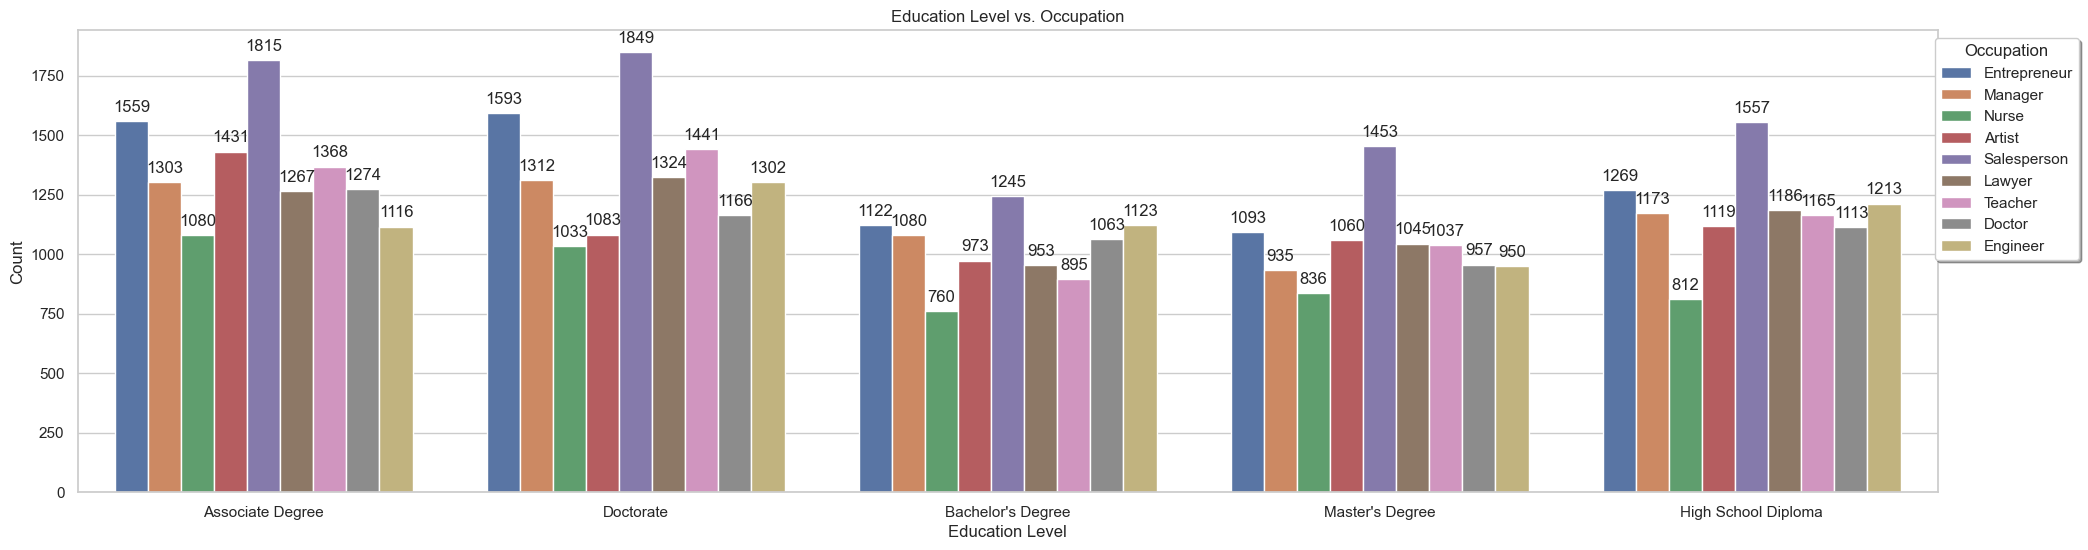

In [18]:
plt.figure(figsize=(24,6))
sns.countplot(data=df, x='Education Level', hue='Occupation')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level vs. Occupation')
plt.xticks()
plt.legend(title='Occupation',loc= 'upper right',bbox_to_anchor=(1.08, 1),fancybox=True, shadow= True, mode='None')
for p in plt.gca().patches:
        plt.gca().annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')
plt.show();

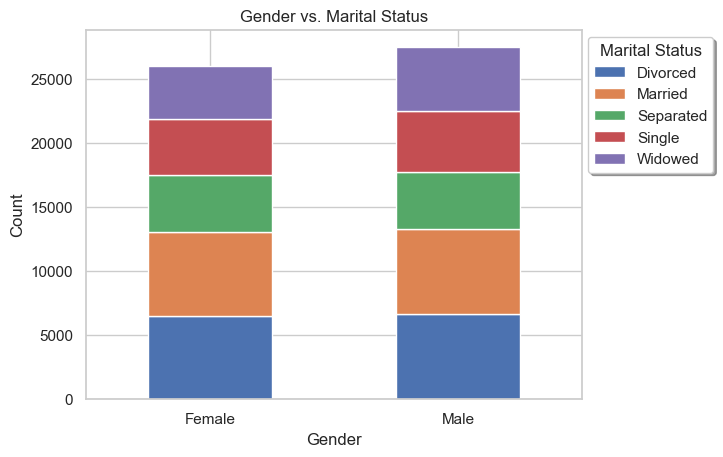

In [19]:
pd.crosstab(df['Gender'], df['Marital Status']).plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs. Marital Status')
plt.xticks(rotation=0)
plt.legend(title='Marital Status',loc= 'upper right',bbox_to_anchor=(1.28, 1),fancybox=True, shadow= True, mode='None')
plt.show()

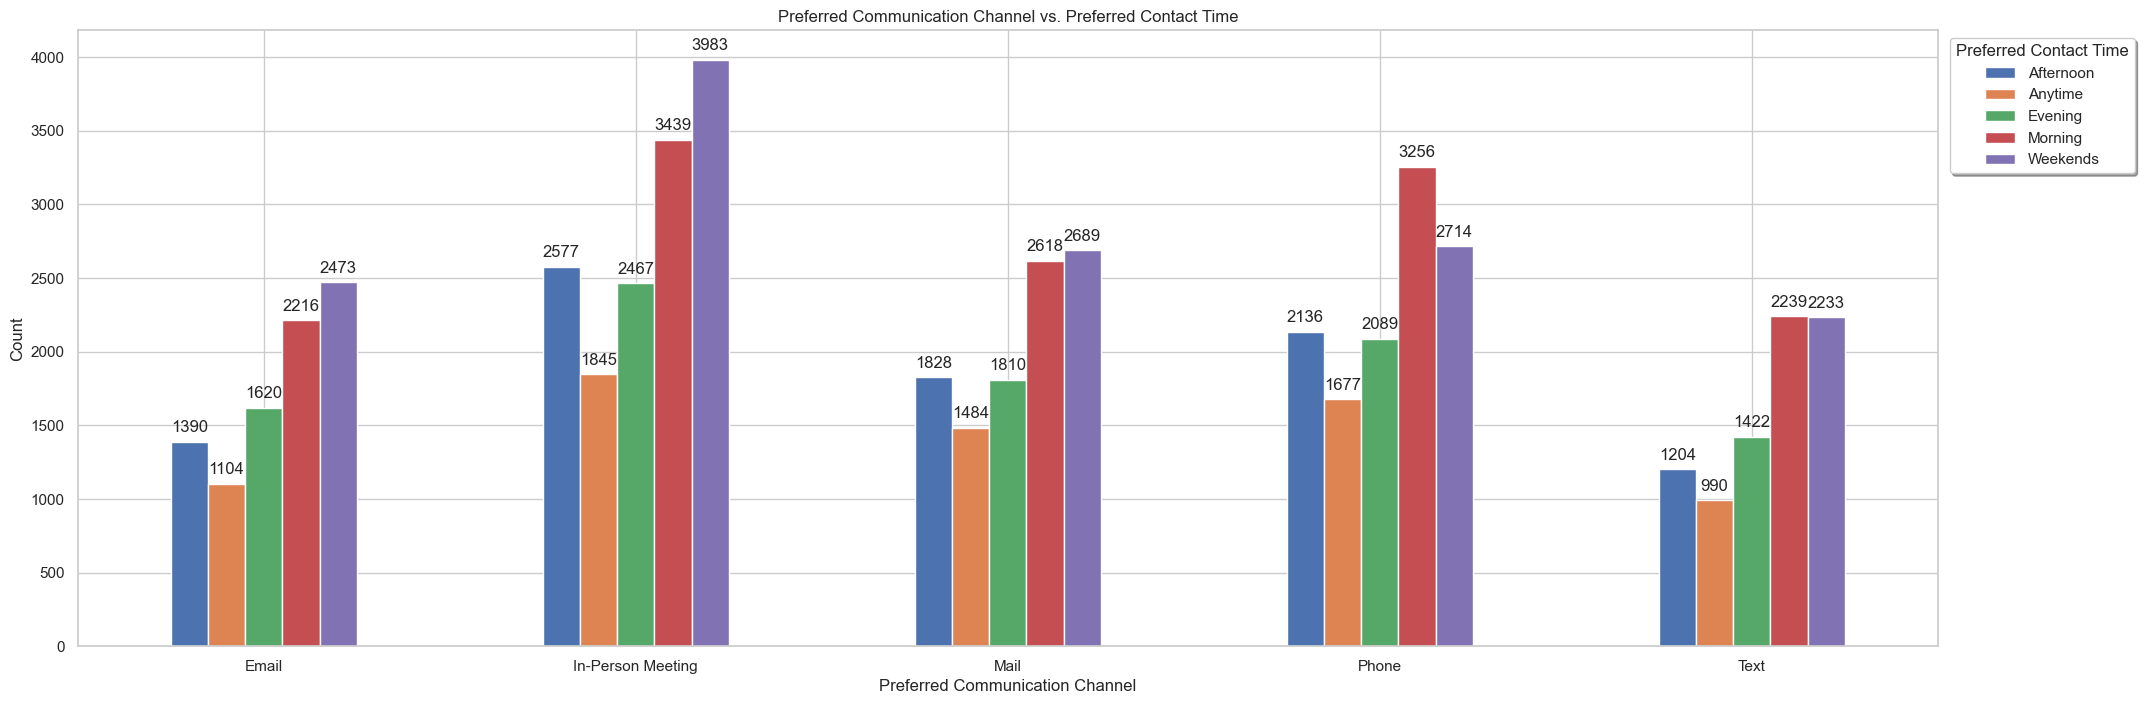

In [21]:
pd.crosstab(df['Preferred Communication Channel'],df['Preferred Contact Time']).plot(kind='bar', figsize=(24, 8))
plt.xlabel('Preferred Communication Channel')
plt.ylabel('Count')
plt.title('Preferred Communication Channel vs. Preferred Contact Time')
plt.xticks(rotation=0)
plt.legend(title='Preferred Contact Time', loc= 'upper right',bbox_to_anchor=(1.11, 1),fancybox=True, shadow= True, mode='None') 
for p in plt.gca().patches:
        plt.gca().annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')
plt.show();

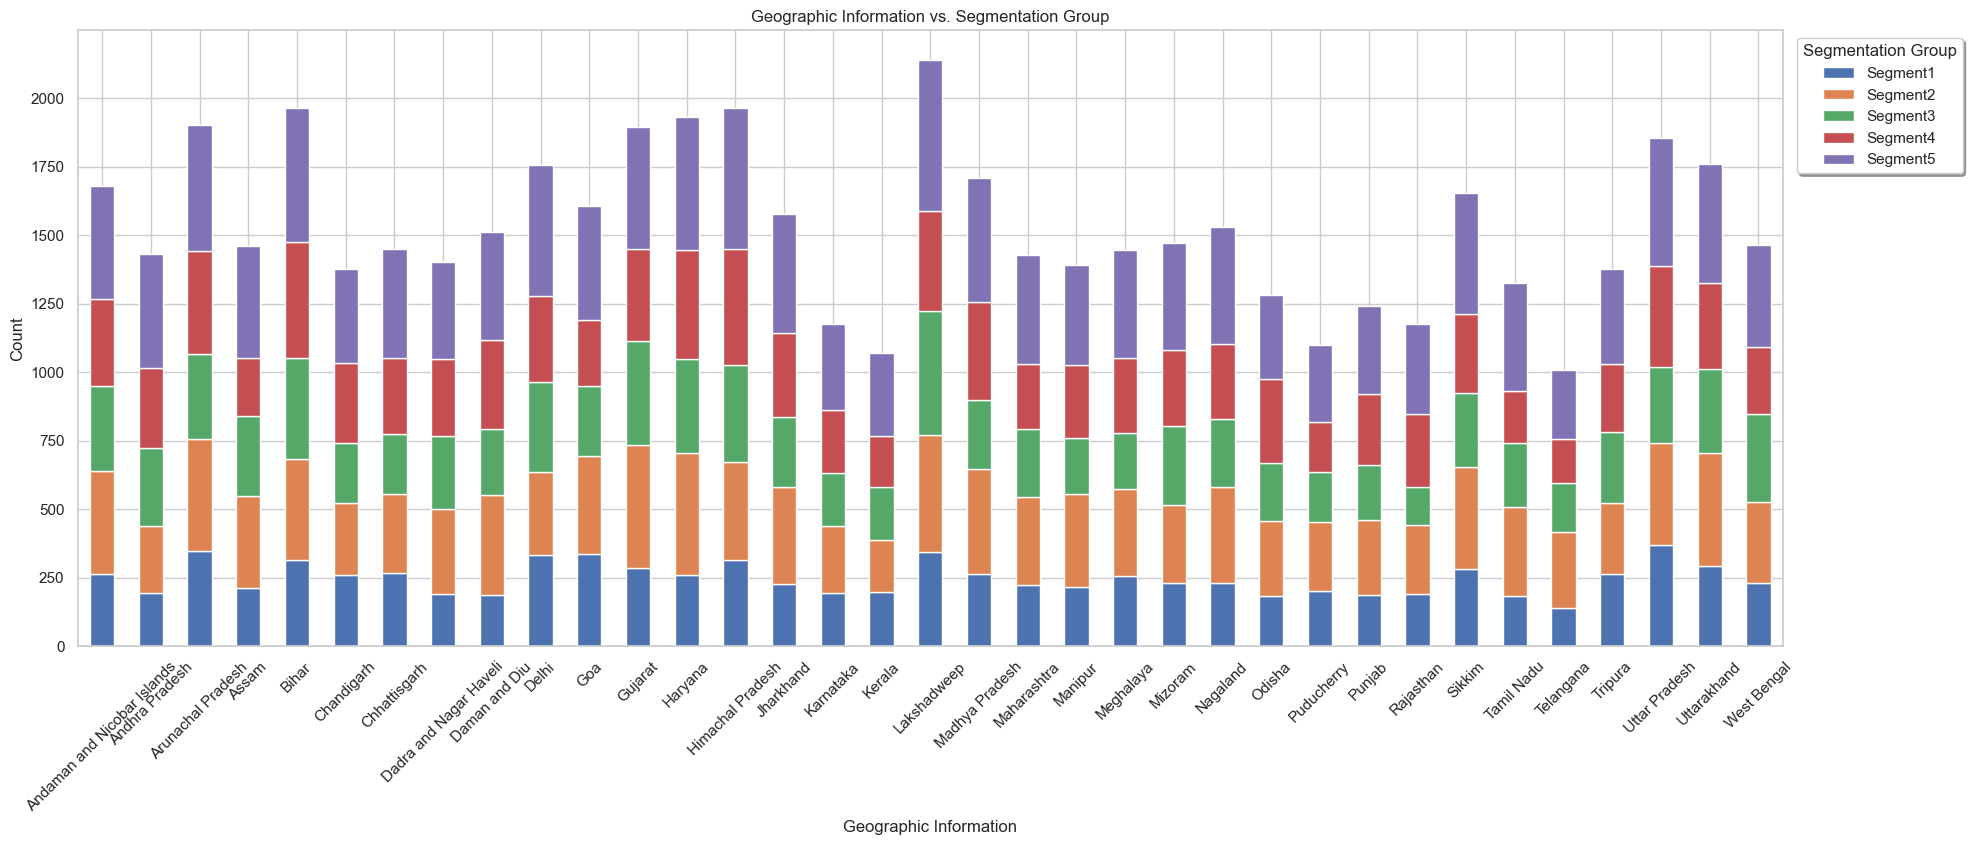

In [22]:
pd.crosstab(df['Geographic Information'], df['Segmentation Group']).plot(kind='bar', stacked=True, figsize=(22, 8))
plt.xlabel('Geographic Information')
plt.ylabel('Count')
plt.title('Geographic Information vs. Segmentation Group')
plt.xticks(rotation=45)
plt.legend(title='Segmentation Group', loc= 'upper right',bbox_to_anchor=(1.11, 1),fancybox=True, shadow= True, mode='None') 
plt.show();

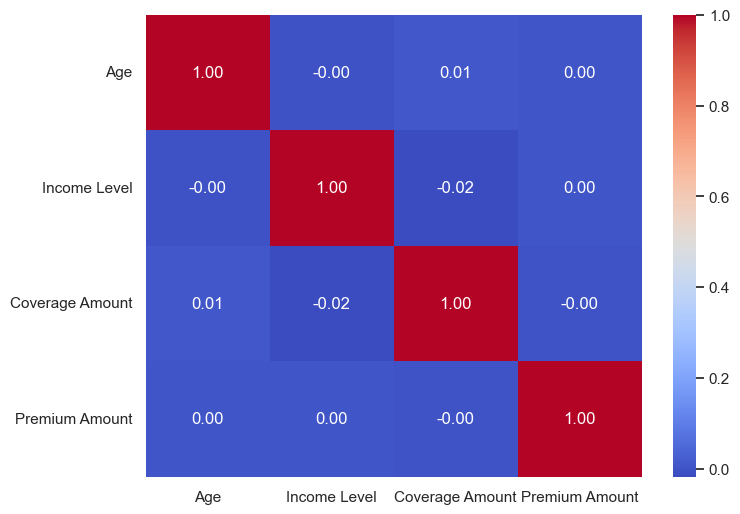

In [23]:
plt.figure(figsize=(8,6))
numerical_data = df.select_dtypes(include=['int64'])
correlation_matrix = numerical_data.corr() 
sns.heatmap(correlation_matrix ,annot=True,cmap='coolwarm', fmt=".2f")
plt.show();

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


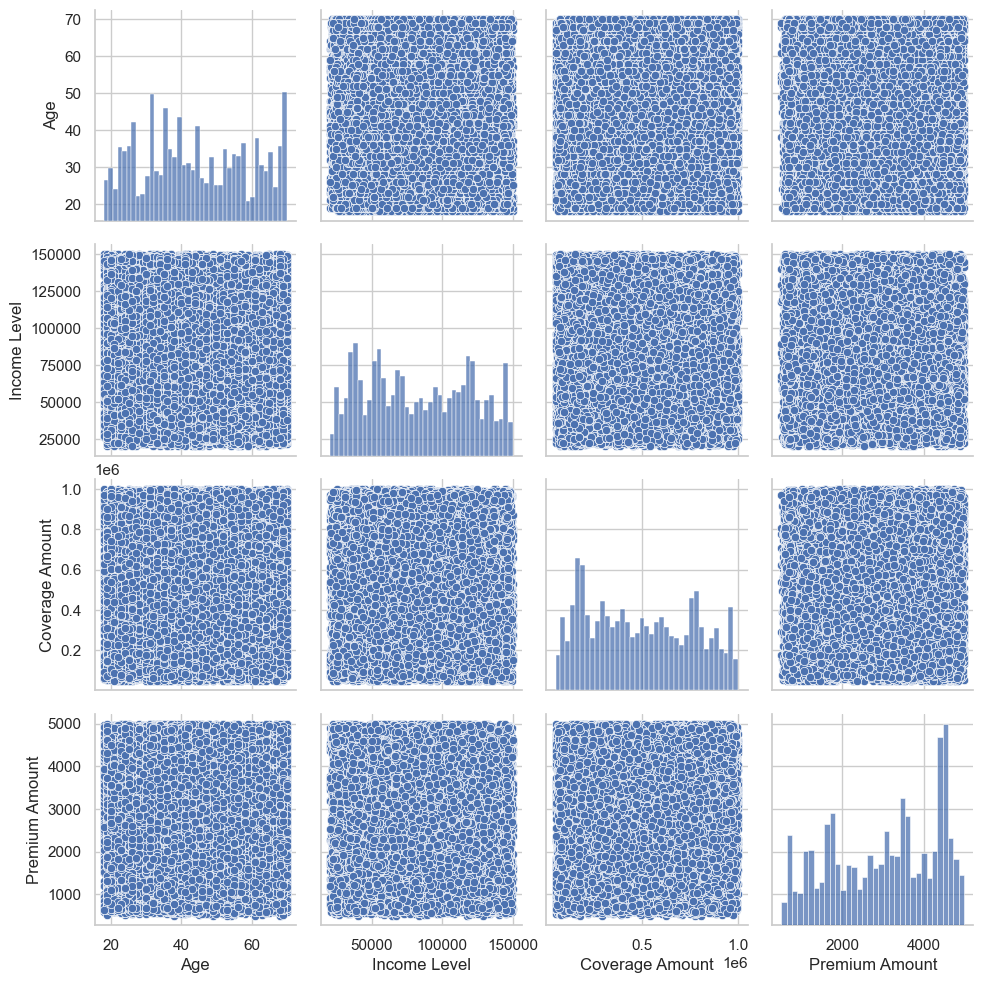

In [24]:
sns.pairplot(df)